In [1]:
# Memanggil Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings

warnings.filterwarnings("ignore")

In [3]:
# Membaca Dataset

In [4]:
data = pd.read_csv('penguins.csv')
data.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [6]:
data = data[:][:200]

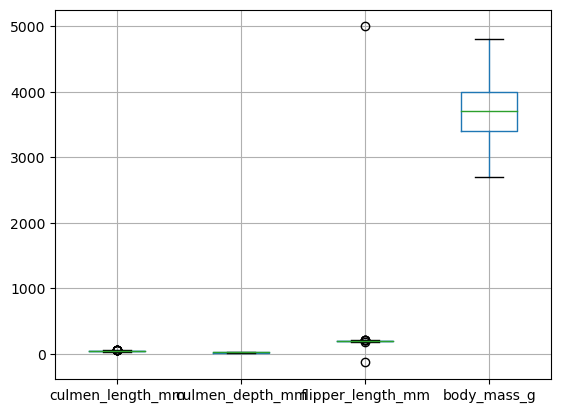

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


In [7]:
data.boxplot()
plt.show()
penguins_df = data.dropna()
penguins_df[penguins_df["flipper_length_mm"] > 4000]
penguins_df[penguins_df["flipper_length_mm"] < 0]
data_clean = penguins_df.drop([9, 14])
data_clean.head()

In [8]:
df = pd.get_dummies(data_clean)
df.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True
6,38.9,17.8,181.0,3625.0,True,False
7,39.2,19.6,195.0,4675.0,False,True
12,41.1,17.6,182.0,3200.0,True,False
13,38.6,21.2,191.0,3800.0,False,True
15,36.6,17.8,185.0,3700.0,True,False


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaling = scaler.fit_transform(df)
data_preprocess = pd.DataFrame(data=scaling, columns = df.columns)
data_preprocess.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.433343,0.284861,-1.468170,0.078663,-1.005195,1.005195
1,-0.355831,-0.816397,-0.754425,0.190708,0.994832,-0.994832
2,-0.200808,-0.308124,0.530316,-1.041782,0.994832,-0.994832
3,-0.898414,0.793135,0.244818,-0.593604,0.994832,-0.994832
4,-0.394587,1.894393,-0.183429,-0.145426,-1.005195,1.005195
5,-0.472099,-0.477549,-1.468170,-0.201448,0.994832,-0.994832
6,-0.413965,1.047271,0.530316,2.151487,-1.005195,1.005195
7,-0.045784,-0.646973,-1.325421,-1.153826,0.994832,-0.994832
8,-0.530233,2.402667,-0.040680,0.190708,-1.005195,1.005195
9,-0.917792,-0.477549,-0.897174,-0.033381,0.994832,-0.994832


In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components = None)
df_pca = pca.fit(data_preprocess)
df_pca.explained_variance_ratio_
n_components = sum(df_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components = n_components)
penguins_PCA = pca.fit_transform(data_preprocess)
print(n_components)

2


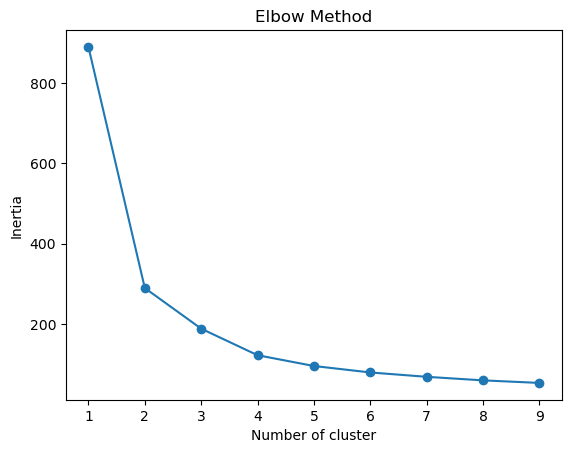

In [11]:
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k, random_state=42).fit(penguins_PCA)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,10), inertia, marker="o")
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [12]:
kmeans = KMeans(n_clusters = 4, random_state=42)
kmeans.fit(penguins_PCA)

KMeans(n_clusters=4, random_state=42)

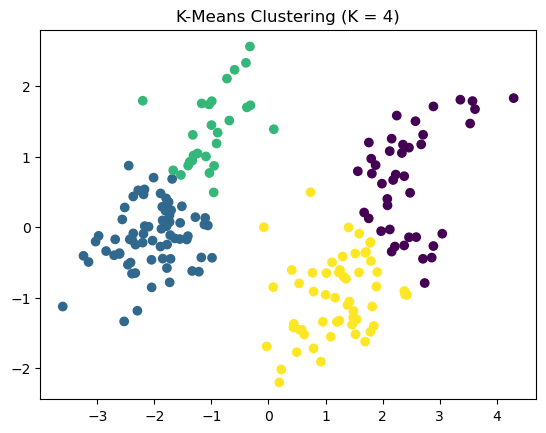

In [13]:
plt.scatter(penguins_PCA[:, 0], penguins_PCA[:, 1], c=kmeans.labels_, cmap="viridis")
plt.title(f"K-Means Clustering (K = 4)")
plt.show()